In [1]:
# Import all the necessary packages: 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV amilile I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.ensemble import RandomForestClassifier

# Set style and font size
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# Ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1. Learn about Dataset

#### Data Dictionary

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### 1.1 Import Data

In [2]:
# Read files
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

### 1.2 Check Null Data
#### Train set

In [3]:
# Display the dimension of the train dataset
df_train.shape

(891, 12)

In [4]:
# Display the first 5 rows of train dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Show the infomation of trainset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Show the descriptive statistics of train dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Sum of null values in train set
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> The above tables show that there are some missing values in Age, Cabin, and Embarked columns

<AxesSubplot:>

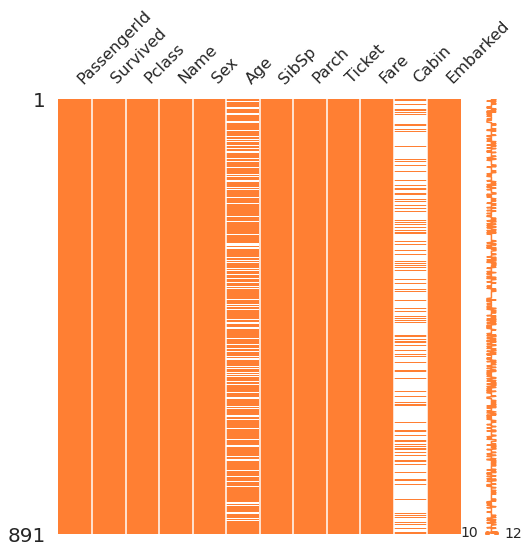

In [8]:
# Show missing values as a matrix
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(1, 0.5, 0.2))

<AxesSubplot:>

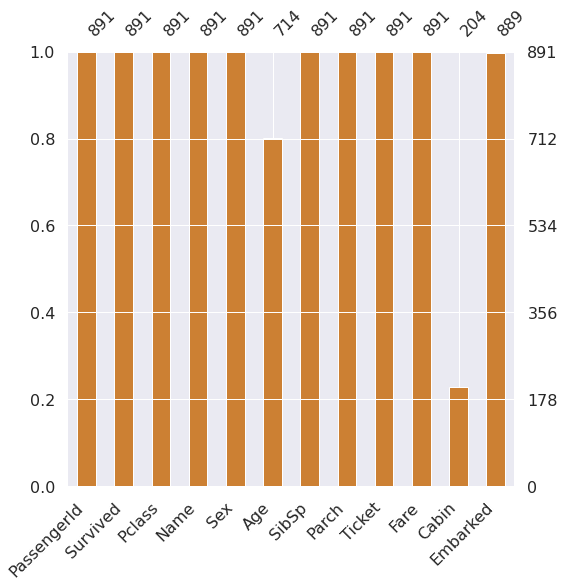

In [9]:
# Show missing values as a bar
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [10]:
# Get percentage of NaN value for each column in train set
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


> There are NaN values in Age, Cabin, and Embarked columns in train set
>
> We need to handle those null values

#### Test set

In [11]:
# Display the dimension of the test dataset
df_test.shape

(418, 11)

In [12]:
# Display the top 10 rows of test dataset
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [13]:
# Show information of test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
# Show the descriptive statistics of test dataset
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Sum of null values in train set
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> The above tables show that there are missing values in Age, Fare, and cabin columns

<AxesSubplot:>

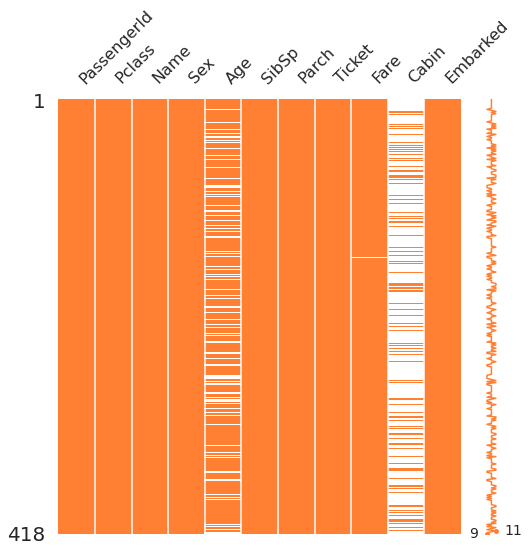

In [16]:
# Show missing values as a matrix
msno.matrix(df=df_test.iloc[:, :], figsize=(8,8), color=(1, 0.5, 0.2))

<AxesSubplot:>

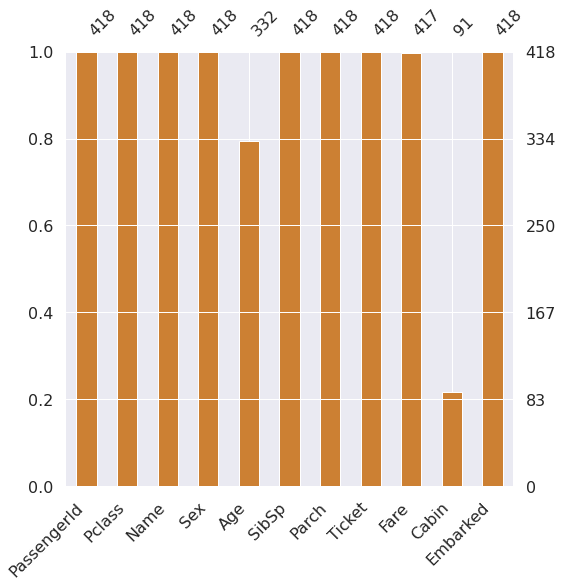

In [17]:
# Show missing values as a bar
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [18]:
# Get percentage of NaN value for each column in test set
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


> There are NaN values in Age, Fare, and Cabin columns in test set
>
> We need to handle those null values

## 2. Target Variable: Survived

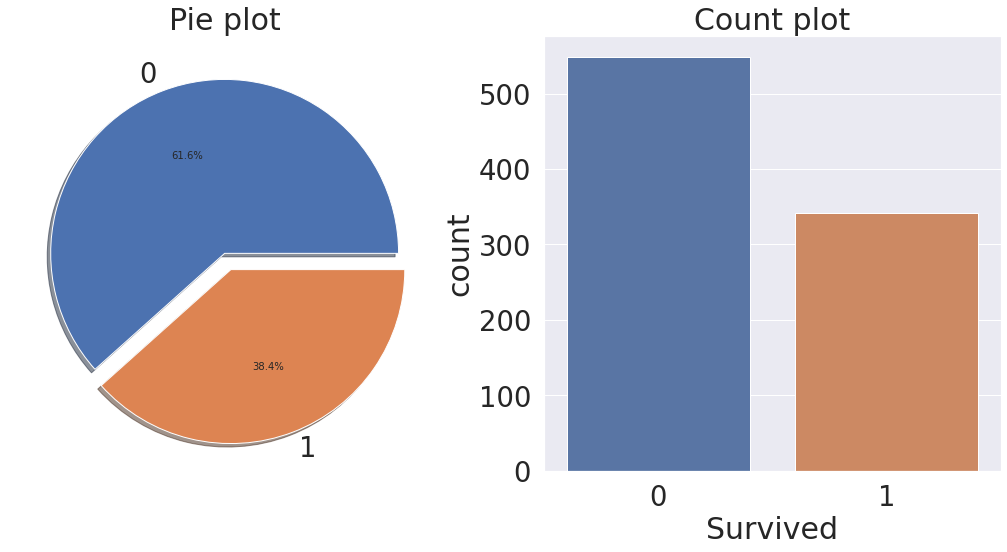

In [19]:
# Create two plots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Create a pie plot to show percentage of survived and not survived
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot')
ax[0].set_ylabel('')

# Create a bar plot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot')

# Show plots
plt.show()

In [20]:
# Get the number of people survived and not survived
df_train.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

> The percentage of not survived is higher than survived
>
> We are going to figure out what features would influence the survival rate

## 3. Features - Exploratory Data Analysis (EDA)

### 3.1 Pclass

In [21]:
# Get the number of people in each class
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# Get the number of survived people in each class
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# Can use crosstab to get the number of survived people in each class
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

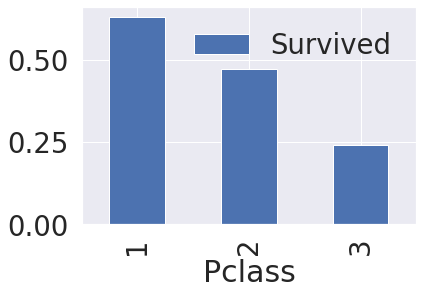

In [24]:
# Show the percentage of survival in each class as a bar chart
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> The largest percentage of survivors were first class passengers, followed by second class, and finally third class.

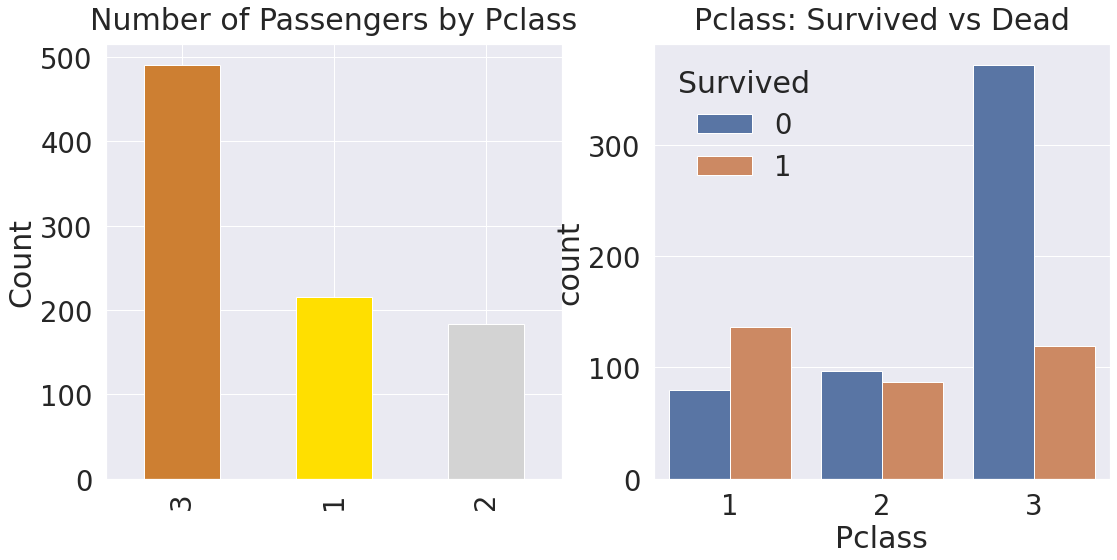

In [25]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

> Titanic were related to their social class: the chances of survival declined with social class as measured by the class in which the passenger travelled.

### 3.2 Sex

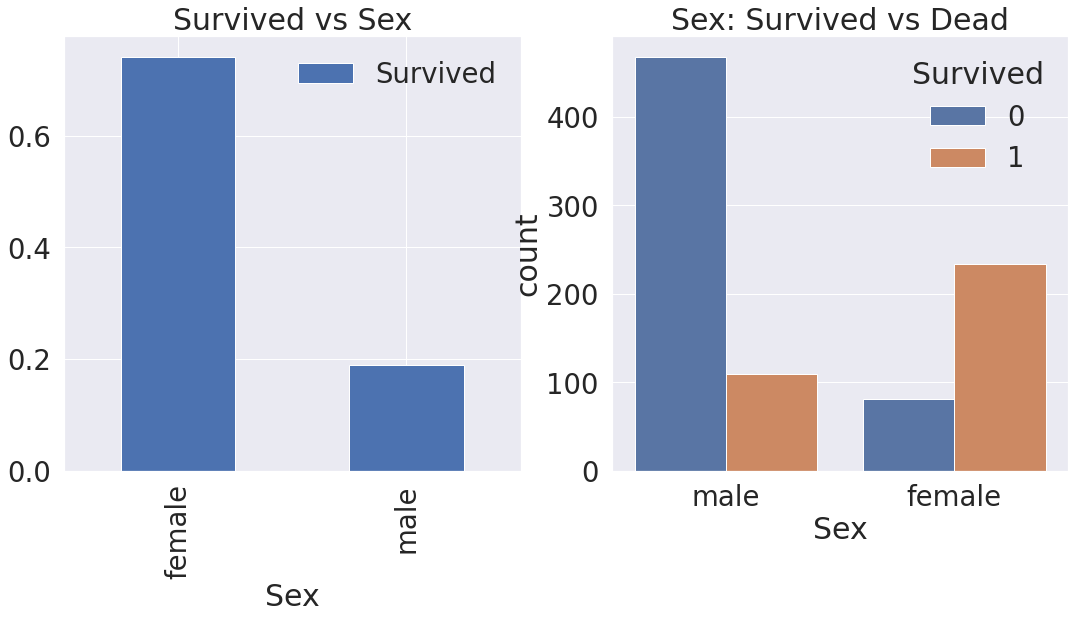

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

> The above charts show that females have been more likely to survive than males.

In [27]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


> Titanic were related to their sex: females were more likely to survive than males.

### 3.3 Age

In [28]:
# Distribution of Age
print('The oldest passenger is : {:.1f} years'.format(df_train['Age'].max()))
print('The youngest passenger is : {:.1f} years'.format(df_train['Age'].min()))
print('The average age is : {:.1f} years'.format(df_train['Age'].mean()))

The oldest passenger is : 80.0 years
The youngest passenger is : 0.4 years
The average age is : 29.7 years


<AxesSubplot:xlabel='Age'>

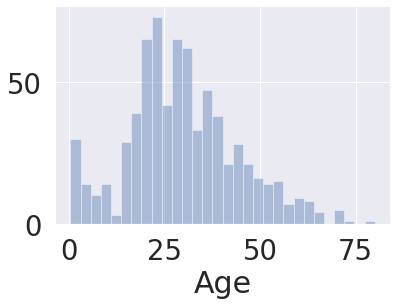

In [29]:
# Train set
sns.distplot(df_train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='Age'>

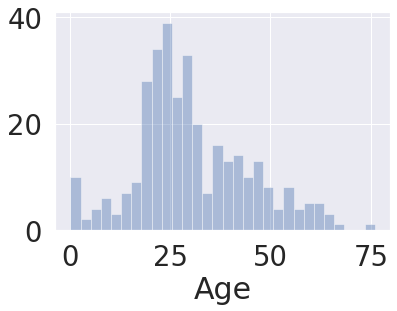

In [30]:
# Test set
sns.distplot(df_test['Age'].dropna(),kde=False,bins=30)

> The majority of the people in titanic was between the Age of 20 and 30

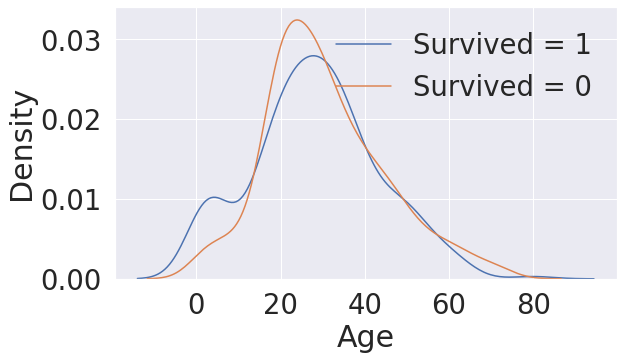

In [31]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

> There is a small peak in younger ages - it shows that children and infants were the priority

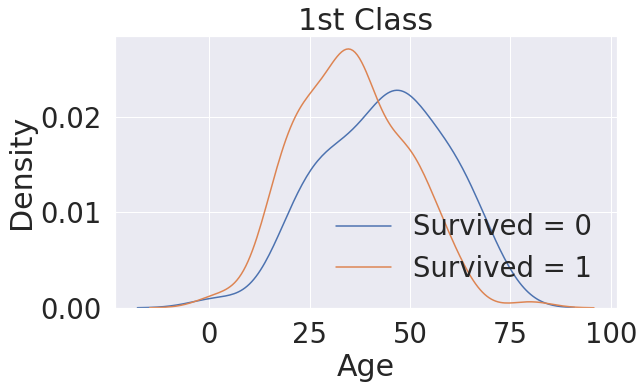

In [32]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived = 0', 'Survived = 1'])
plt.title('1st Class')
plt.show()

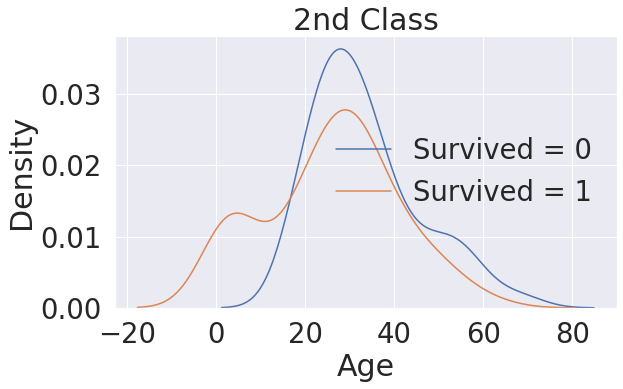

In [33]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived = 0', 'Survived = 1'])
plt.title('2nd Class')
plt.show()

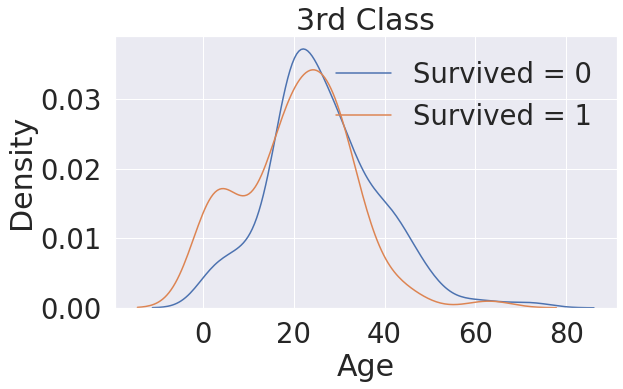

In [34]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived = 0', 'Survived = 1'])
plt.title('3rd Class')
plt.show()

> For each class, looking at the very left part of the distribution, it shows that children and infants were the priority

### 3.4 Pclass, Sex, Age

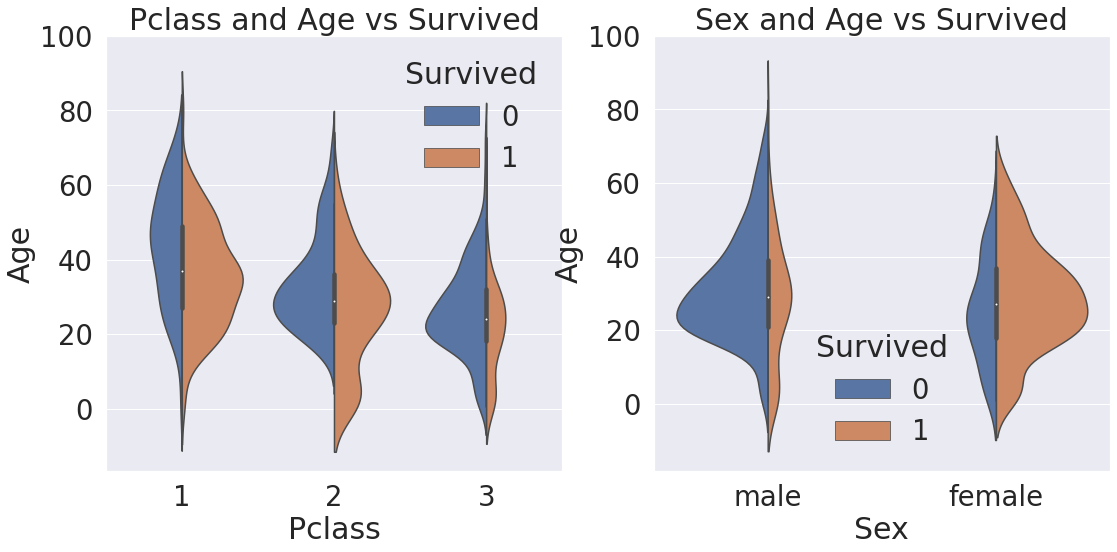

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 20))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 20))

plt.show()

> The above two violin plots show that:
>
> * children and infants were the priority
> * female passengers were the priority

### 3.5 Embarked

<AxesSubplot:xlabel='Embarked'>

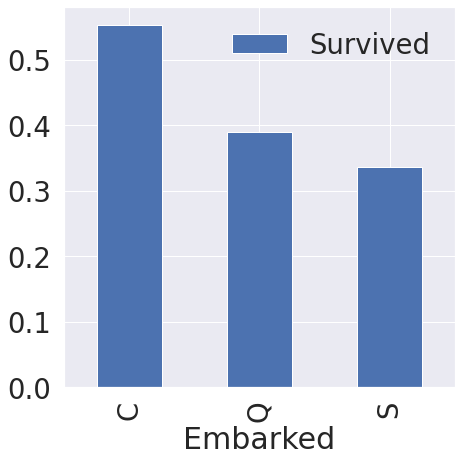

In [36]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

> C has the highest survival rate

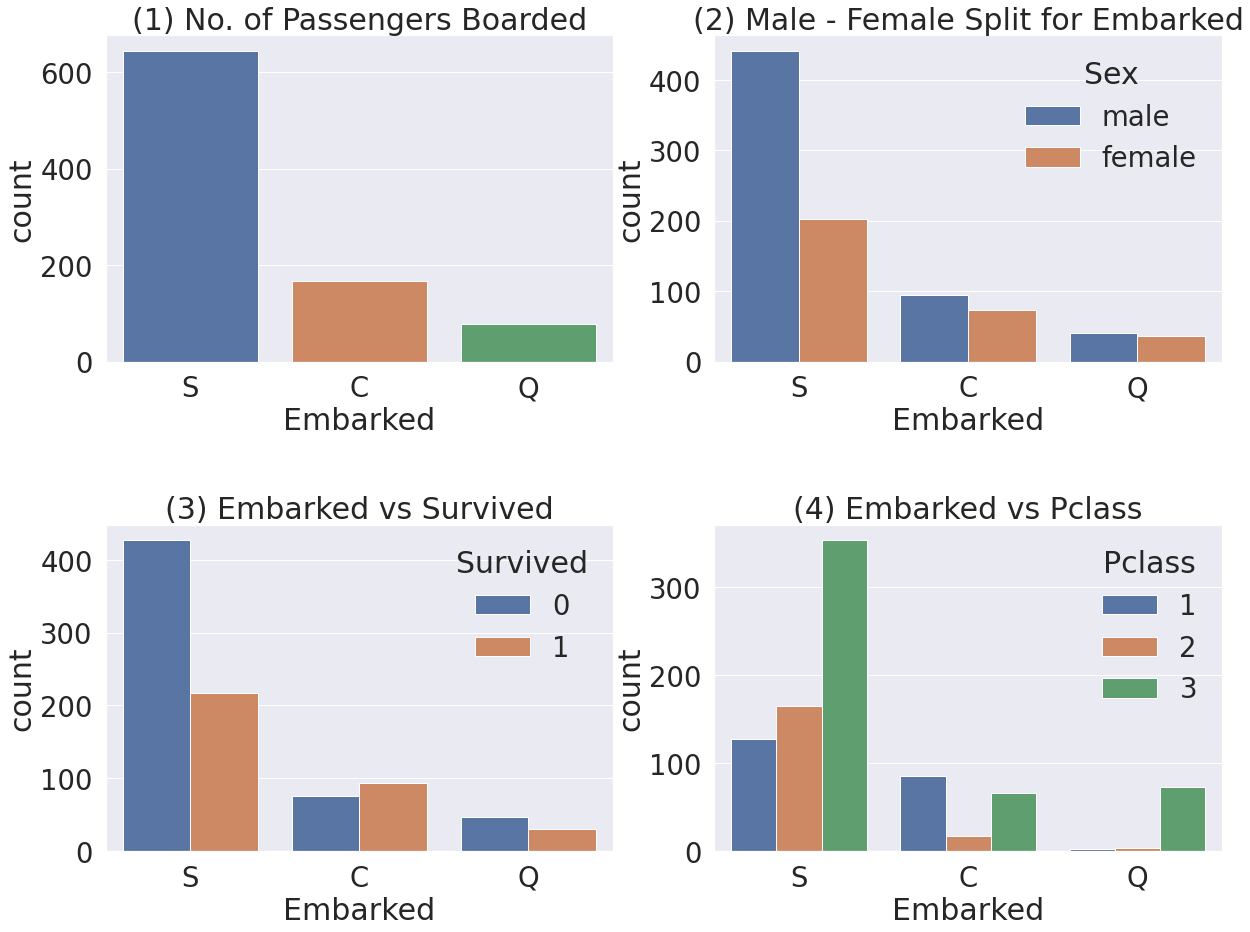

In [37]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male - Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> S has more passengers than C & Q
>
> C & Q has a higher rate of female population
>
> Passengers from Q and S have been more likely to be dead
>
> Since C has many female and many first class, passengers from C have been more likely to survive

### 3.6 SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

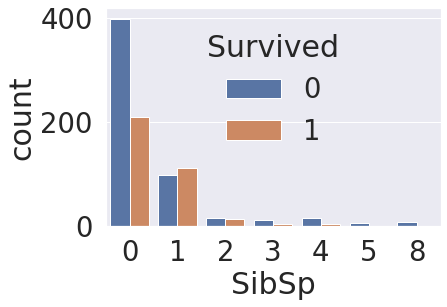

In [38]:
sns.countplot('SibSp', hue='Survived', data=df_train)

<AxesSubplot:xlabel='SibSp'>

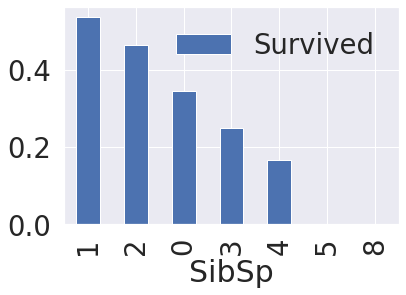

In [39]:
# Show the percentage of survival
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> The above chart shows that passengers with one sibling or a spouse have been more likely to survive

### 3.7 Parch

<AxesSubplot:xlabel='Parch', ylabel='count'>

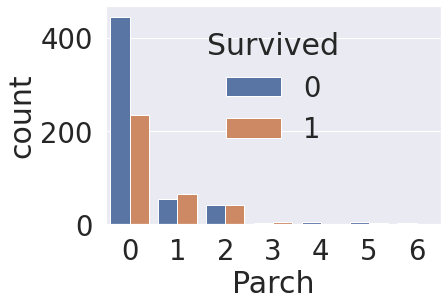

In [40]:
sns.countplot('Parch', hue='Survived', data=df_train)

<AxesSubplot:xlabel='Parch'>

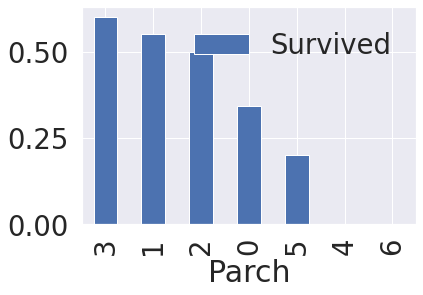

In [41]:
# Show the percentage of survival
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> The above chart shows that passengers aboarded with more than 2 parents or childeren have been more likely to survive - So the parents might’ve saved the kids before themselves, thus explaining the rates
>
> The above chart also shows that passengers aboarded alone have been more likely to be dead

### 3.8 Family

<AxesSubplot:>

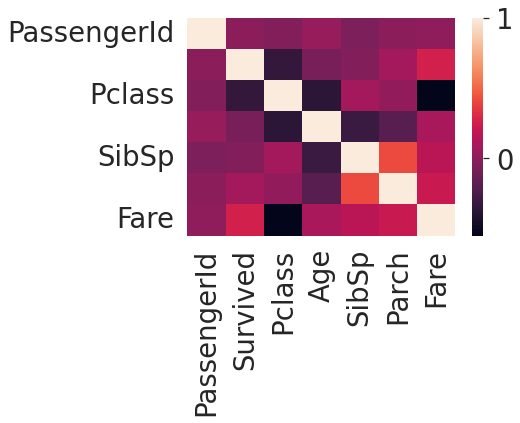

In [42]:
# Check correlation between Parch and SibSp
sns.heatmap(df_train.corr())

> We can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together
>
> I decided to make a new column "FamilySize" to anlayze

In [43]:
# Create a new column "FamilySize" in trainset
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [44]:
# Also - create "FamilySize" in testset
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [45]:
# Display maximum/minimum size of family
print('Train dataset')
print('Maximum size of Fmaily: ', df_train['FamilySize'].max())
print('Minimum size of Fmaily: ', df_train['FamilySize'].min())

print('')
print('Test dataset')
print('Maximum size of Fmaily: ', df_test['FamilySize'].max())
print('Minimum size of Fmaily: ', df_test['FamilySize'].min())

Train dataset
Maximum size of Fmaily:  11
Minimum size of Fmaily:  1

Test dataset
Maximum size of Fmaily:  11
Minimum size of Fmaily:  1


(0.0, 11.0)

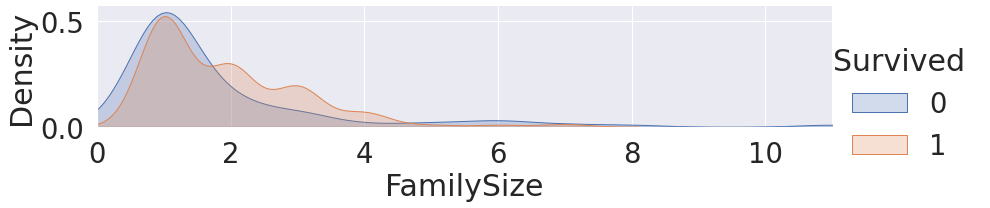

In [46]:
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, df_train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

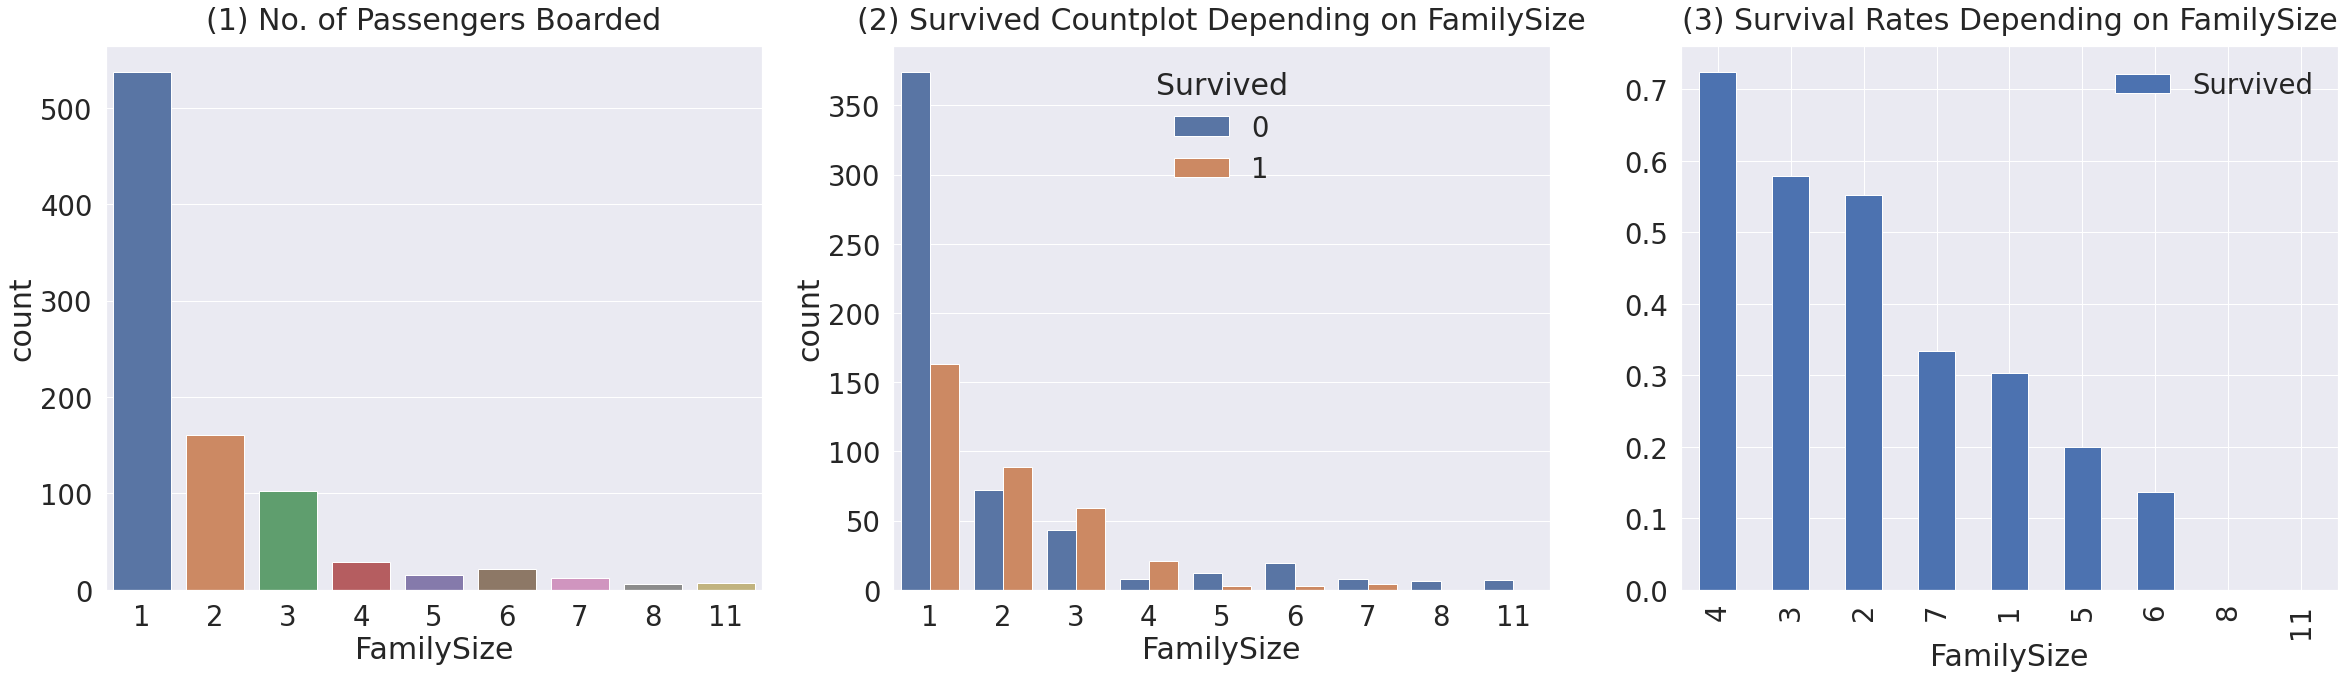

In [47]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived Countplot Depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survival Rates Depending on FamilySize', y =1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> Survival rates increase up to family sizes of 4 people and then fall significantly for larger families

## 4. Feature Engineering
### 4.1 Name

Let's covert string variables to categorical variables

In [48]:
# Combine train and test dataset
train_test_data = [df_train, df_test]

# Extract all the titles and save them to column Title
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [49]:
# Train set
# There are big 4 groups - Mr, Miss, Mrs, Others
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [50]:
# Test set
# There are big 4 groups - Mr, Miss, Mrs, Others
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [51]:
# Mapping
title_mapping = {'Mr': 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,"Capt": 3, "Ms": 3,
                 "Sir": 3, "Lady": 3, "Mme": 3, "Don": 3, "Jonkheer": 3, "Dona": 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [52]:
# Show if mapping was correct - yes
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [53]:
# Mapping correctly
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,2


<AxesSubplot:xlabel='Title', ylabel='count'>

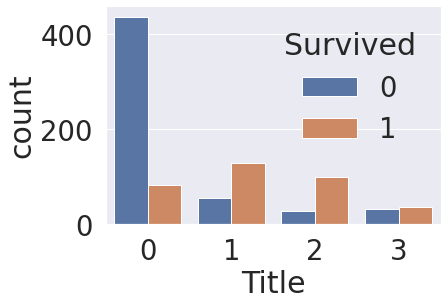

In [54]:
# Can see the proportion of survived and dead passengers for each titles
sns.countplot('Title', hue='Survived', data=df_train)

> Show that female passengers were the priority

In [55]:
# Drop unnecessary feature from dataset
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

### 4.2 Sex

In [56]:
# Display unique values in Sex column
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [57]:
# Mapping
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

<AxesSubplot:xlabel='Sex', ylabel='count'>

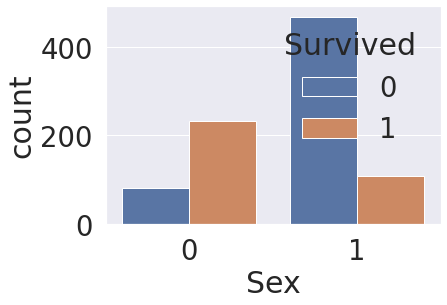

In [58]:
# Can see it's mapped well
sns.countplot('Sex', hue='Survived', data=df_train)

### 4.3 Age
We already know that there are some missing values in Age - Let's handle missing values

In [59]:
# Let's fill missing values with median age for each title (Mr, Mrs, Miss, Others)
df_train['Age'].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
df_test['Age'].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)

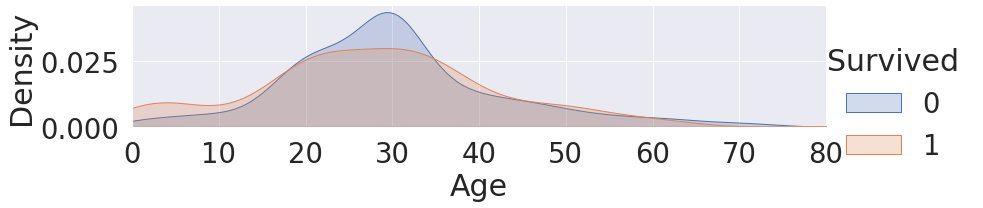

In [60]:
# Draw a graph
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.show()

> Again, we can see that childeren and infants were priority

(20.0, 30.0)

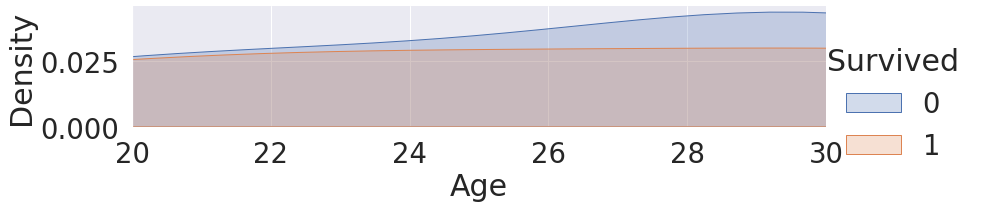

In [61]:
# Can take a look at the graph closely
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

In [62]:
# No missing values anymore
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

In [63]:
# Now, let's categorize Age
for dataset in train_test_data:
    dataset.loc[dataset['Age'] < 10, 'Age'] = 0
    dataset.loc[(10 <= dataset['Age']) & (dataset['Age'] < 20), 'Age'] = 1
    dataset.loc[(20 <= dataset['Age']) & (dataset['Age'] < 30), 'Age'] = 2
    dataset.loc[(30 <= dataset['Age']) & (dataset['Age'] < 40), 'Age'] = 3
    dataset.loc[(40 <= dataset['Age']) & (dataset['Age'] < 50), 'Age'] = 4
    dataset.loc[(50 <= dataset['Age']) & (dataset['Age'] < 60), 'Age'] = 5
    dataset.loc[(60 <= dataset['Age']) & (dataset['Age'] < 70), 'Age'] = 6
    dataset.loc[(70 <= dataset['Age']), 'Age'] = 7

In [64]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,3.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,1,3.0,0,0,373450,8.0500,NaN,S,1,0


In [65]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,1,3.0,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,0,4.0,1,0,363272,7.0000,NaN,S,2,2
2,894,2,1,6.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,1,2.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,0,2.0,1,1,3101298,12.2875,NaN,S,3,2


<AxesSubplot:xlabel='Age', ylabel='count'>

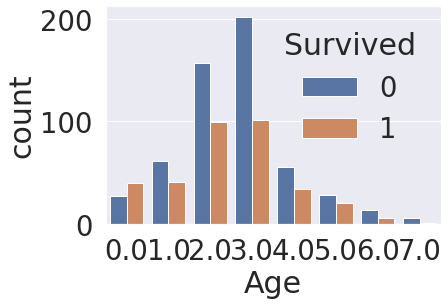

In [66]:
sns.countplot('Age', hue="Survived", data=df_train)

> Again, the priority was childern and infants

### 4.4 Embarked

> Embarked is maybe an important feature as rich people/poor people may live in certain cities

<AxesSubplot:>

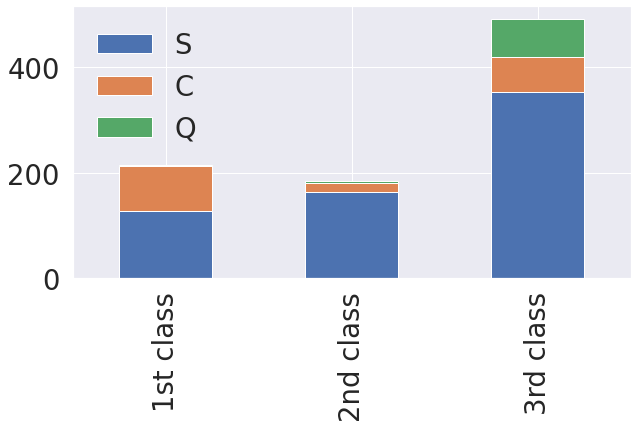

In [67]:
Pclass1 = df_train[df_train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df_train[df_train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df_train[df_train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

> Q has the least 1st class passengers
> 
> S is the majority for every class - that is, we can fill up the missing values with S

In [68]:
# Let's fill out missing embark with S
for dataset in train_test_data:
    dataset['Embarked'].fillna('S', inplace=True)

In [69]:
# Completed filling out missing values
print(df_train['Embarked'].isnull().sum())
print(df_test['Embarked'].isnull().sum())

0
0


In [70]:
# Now, let's mapping the embark data
embarked_mapping = {"S": 0, "C": 1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [71]:
# Display first few rows
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,0,3.0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,1,3.0,0,0,373450,8.0500,NaN,0,1,0


### 4.5 Fare

Let's handle missing values

In [72]:
# Fill missing values with median fare for each Pclass
df_train['Fare'].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
df_test['Fare'].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

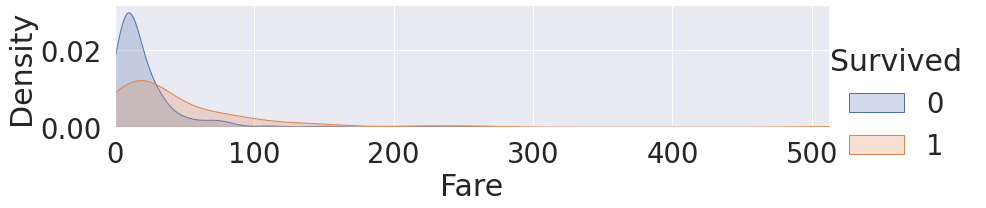

In [73]:
# Draw a graph
facet = sns.FacetGrid(df_train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.show()

> Looking at the graph above, we can see that the cheaper ticket fare meant that more people died

(0.0, 20.0)

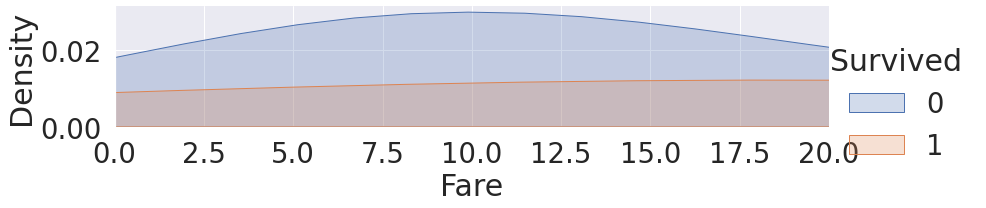

In [74]:
# Can see the graph closely
facet = sns.FacetGrid(df_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

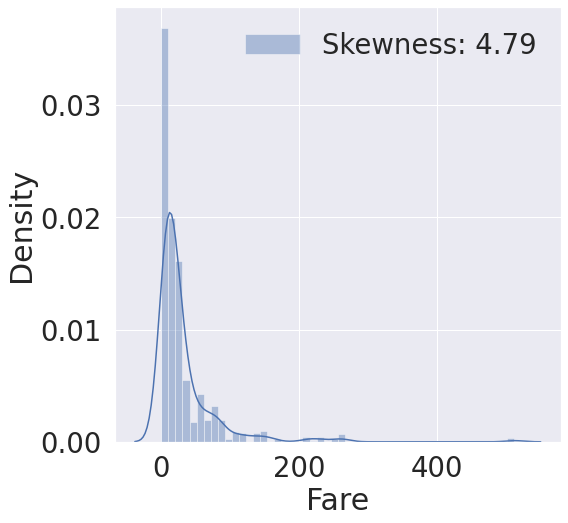

In [75]:
# Let's check the skewness
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

> We are going to convert skewed data into a normal distribution by applying the logarithm 

In [76]:
# Apply the logarithm
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

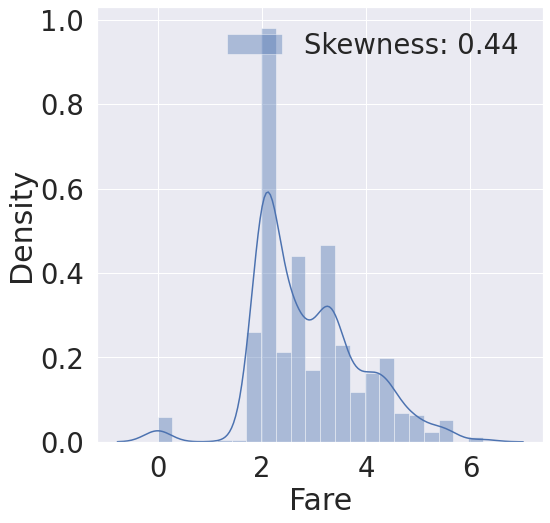

In [77]:
# Let's check the skewness again
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

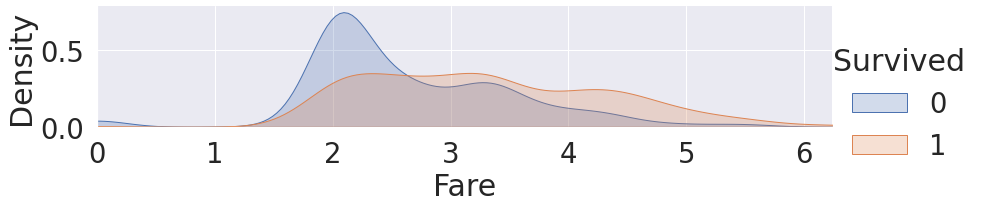

In [78]:
# Draw a graph again
facet = sns.FacetGrid(df_train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.show()

In [79]:
# Let's categorize fare
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 1.5, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 1.5) & (dataset['Fare'] <= 3), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 3) & (dataset['Fare'] <= 4.5), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 4.5, 'Fare'] = 3

<AxesSubplot:xlabel='Fare', ylabel='count'>

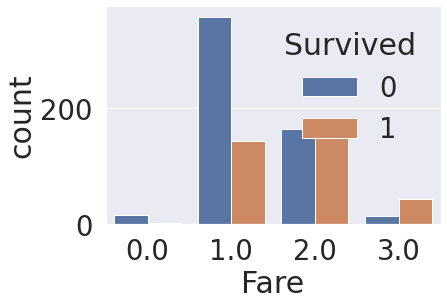

In [80]:
sns.countplot('Fare', hue="Survived", data=df_train)

> The more expensive fare, the higher possiblity to survive

### 4.6 Cabin

In [81]:
# Let's check count of values
df_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

> If we look at the Cabin feature we can see that each cabin starts with an alphabet 
>
> These could be Cabin sections similar to the ones we have on trains or flights

<AxesSubplot:>

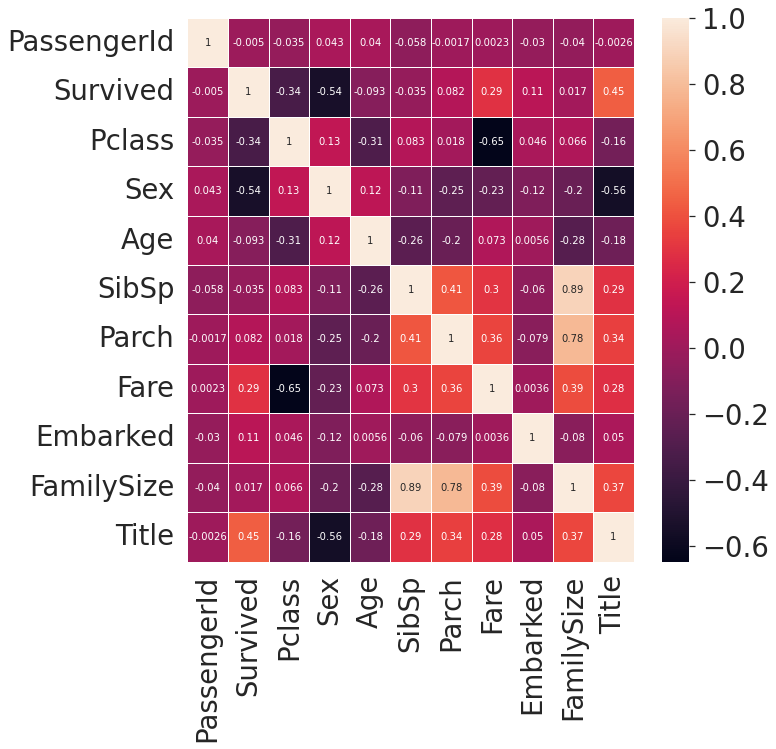

In [82]:
# I guess that Cabin and Pclass are correlated - let's see
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, ax=ax)

In [83]:
# Let's extract the first alphabet
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

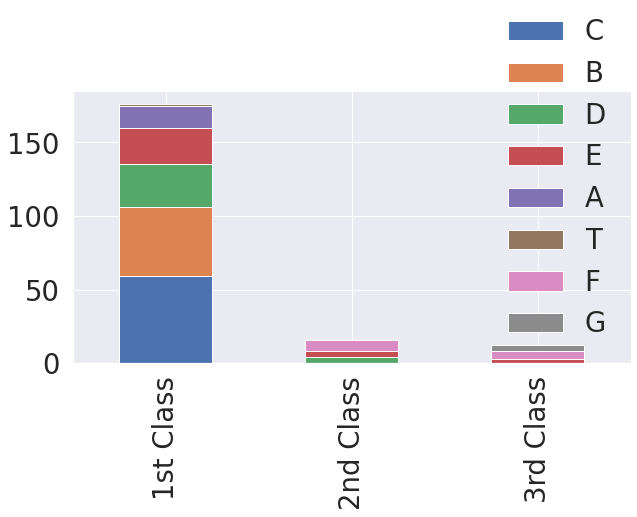

In [84]:
# Create a bar graph for Pclass and Cabin
Pclass1 = df_train[df_train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df_train[df_train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df_train[df_train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked = True, figsize=(10,5))

> A, B, C, D, E in 1st Class
>
> 2nd and 3rd Classes don't have A, B, C, D, E

In [85]:
# Let's mapping the data
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F":2, "G":2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [86]:
# Fill missing Fare with median fare for each Pclass
df_train['Cabin'].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test['Cabin'].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [87]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,1,2.0,1,0,A/5 21171,1.0,2.0,0,2,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,1.0,2.0,0,1,1
3,4,1,1,0,3.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,1,3.0,0,0,373450,1.0,2.0,0,1,0


In [88]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,1,3.0,0,0,330911,3.0,2.0,2,1,0
1,893,3,0,4.0,1,0,363272,3.0,2.0,0,2,2
2,894,2,1,6.0,0,0,240276,3.0,2.0,2,1,0
3,895,3,1,2.0,0,0,315154,3.0,2.0,0,1,0
4,896,3,0,2.0,1,1,3101298,3.0,2.0,0,3,2


### 4.7 Family

In [89]:
df_train['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [90]:
# Let's mapping the data
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [91]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,1,2.0,1,0,A/5 21171,1.0,2.0,0,0.4,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,1,0.4,2
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,1.0,2.0,0,0.0,1
3,4,1,1,0,3.0,1,0,113803,2.0,0.8,0,0.4,2
4,5,0,3,1,3.0,0,0,373450,1.0,2.0,0,0.0,0


In [92]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,1,3.0,0,0,330911,3.0,2.0,2,0.0,0
1,893,3,0,4.0,1,0,363272,3.0,2.0,0,0.4,2
2,894,2,1,6.0,0,0,240276,3.0,2.0,2,0.0,0
3,895,3,1,2.0,0,0,315154,3.0,2.0,0,0.0,0
4,896,3,0,2.0,1,1,3101298,3.0,2.0,0,0.8,2


In [93]:
# Let's drop unnecessary features
features_drop = ['SibSp', 'Parch', 'Ticket']
df_train = df_train.drop(features_drop, axis=1)
df_test = df_test.drop(features_drop, axis=1)
df_train = df_train.drop(['PassengerId'], axis=1)

In [94]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,1,2.0,1.0,2.0,0,0.4,0
1,1,1,0,3.0,2.0,0.8,1,0.4,2
2,1,3,0,2.0,1.0,2.0,0,0.0,1
3,1,1,0,3.0,2.0,0.8,0,0.4,2
4,0,3,1,3.0,1.0,2.0,0,0.0,0


In [95]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,1,3.0,3.0,2.0,2,0.0,0
1,893,3,0,4.0,3.0,2.0,0,0.4,2
2,894,2,1,6.0,3.0,2.0,2,0.0,0
3,895,3,1,2.0,3.0,2.0,0,0.0,0
4,896,3,0,2.0,3.0,2.0,0,0.8,2


## 5. Modelling

In [96]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   FamilySize  891 non-null    float64
 8   Title       891 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


### 5.1 Cross Validation
#### 5.1.1 KNN

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [99]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
train_data = df_train.drop('Survived', axis=1)
target = df_train['Survived']
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.80898876 0.82022472 0.83146067
 0.82022472 0.76404494 0.82022472 0.85393258]


In [100]:
# Let's round kNN Score
round(np.mean(score)*100, 2)

81.14

### 5.1.2 Decision Tree

In [101]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.76404494 0.74157303 0.78651685 0.80898876 0.73033708
 0.79775281 0.82022472 0.75280899 0.7752809 ]


In [102]:
# Let's round Decision tree score
round(np.mean(score)*100, 2)

77.33

### 5.1.3 Random Forest

In [103]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.78888889 0.79775281 0.79775281 0.76404494 0.86516854 0.78651685
 0.84269663 0.85393258 0.76404494 0.78651685]
80.47


### 5.1.4 Naive Bayes

In [104]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.84444444 0.73033708 0.76404494 0.75280899 0.71910112 0.80898876
 0.75280899 0.78651685 0.83146067 0.84269663]
78.33


### 5.1.5 SVM

In [105]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.82222222 0.79775281 0.80898876 0.80898876 0.84269663 0.82022472
 0.82022472 0.85393258 0.82022472 0.85393258]
82.49


## 6. Testing

In [106]:
clf = SVC()
clf.fit(train_data, target)

test_data = df_test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [107]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('./submission.csv', index=False)

In [108]:
submission = pd.read_csv('submission.csv')
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
